<a href="https://colab.research.google.com/github/shohan4556/survery-data-analysis/blob/master/survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions:

this dataset is a longitudinal survey of recipients of job training. They were given training on how to use freelance work to increase their income. The survey asks about gig work income, gig type, and opinions about the work compared to regular employee work. 

Important notes: 
1. All work should be done in this notebook. Everything should be replicable. It is live and monitored.

2. At the top of each cell, write your initials or some code indicating that this is your code. If you change someone else's code, notate that incomments

3. In contingency or other types of tables, include an N count. If it's a median of income drivers working 15 hours a week/ how many respondents is that? If its a median of 5, there should be a column in the table that has a value of N=5.

4. Update: when creating tables, please use pandas GroupBy feature

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

It's important because we want to be able to investigate by different types of subgroups and apply different functions (like, for instance, find out the interquartile range of Uber drivers working 15 hours a week)

-- The data for the notebook is in three google sheets. The first tab has question wording of each variable

#data sorces. you will have to load them separate and maybe change the path name
https://docs.google.com/spreadsheets/d/1SrNdTp7mZAf6CdF6sWavZGMk3lhZgTxl8mDc6uUWdw0/edit?usp=sharing

https://docs.google.com/spreadsheets/d/1Y439FpgAzmec7VbLvdqsoI_GN4YNjNFTCzQtDx66W9k/edit?usp=sharing

https://docs.google.com/spreadsheets/d/11kyMbR_SpqA-aNdJ2A2cQnIwss1DuBM2x3FAM92Xqss/edit?usp=sharing


The goal of the survey is to see how income from gig work changes over time. Some respondents will do no gig work. Some will do a lot. This investigates how income changes, and how it is associated with type of gig work, hours work, if they have another job or their opinions on gig work.




In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import Data :
---

In [0]:
#shohan code
#import dataset 
#df = pd.read_csv('/content/my_data.csv', index_col=0)

#data sorces. you will have to load them separate and maybe change the path name
#https://docs.google.com/spreadsheets/d/1SrNdTp7mZAf6CdF6sWavZGMk3lhZgTxl8mDc6uUWdw0/edit?usp=sharing
#https://docs.google.com/spreadsheets/d/1Y439FpgAzmec7VbLvdqsoI_GN4YNjNFTCzQtDx66W9k/edit?usp=sharing
#https://docs.google.com/spreadsheets/d/11kyMbR_SpqA-aNdJ2A2cQnIwss1DuBM2x3FAM92Xqss/edit?usp=sharing

df = pd.read_csv('/content/Samaschool_6 Month Data_T4A - 6Month.csv')
df2 = pd.read_csv('/content/Samaschool_9 Month Data_T4A - 9Month.csv')
df3 = pd.read_csv('/content/Samaschool_1 Month Data_T4A - 1Month.csv')

df = df.rename(columns=df.iloc[1])
df2 = df2.rename(columns=df2.iloc[1])
df3 = df3.rename(columns=df3.iloc[1])

df.drop(df.index[:3], inplace=True)
df2.drop(df2.index[:3], inplace=True)
df3.drop(df3.index[:3], inplace=True)


In [0]:
print('data 1 :', df.shape)
print('data 2 :', df2.shape)
print('data 3 :', df3.shape)

data 1 : (221, 195)
data 2 : (242, 178)
data 3 : (170, 65)


In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

### Clean Data :
---

In [0]:
#shohan code
#drop all empty column 
#df.dropna(how='all', axis=1, inplace=True)
df.columns = df.columns.str.replace('\d+', '')
df.columns = df.columns.str.rstrip('.')

df2.columns = df2.columns.str.replace('\d+', '')
df2.columns = df2.columns.str.rstrip('.')

df3.columns = df3.columns.str.replace('\d+', '')
df3.columns = df3.columns.str.rstrip('.')

#df.columns.values
#df.head()

In [0]:
#remove duplicate columns
df3 = df3.loc[:,~df3.columns.duplicated()]

### Merge Data :
---

In [0]:
#shohan code
mapping = {'x': df, 'y': df2, 'z':df3}

merged_df = pd.concat(mapping, ignore_index=True, sort=False)
merged_df.to_csv('/content/merged_data.csv')

print(merged_df.shape)
merged_df.head()

(633, 247)


,_respondentid,_startdate,_enddate,_optin,_incgen.primary,_incgen.primary.emp,_incgen.primary.indw,_incgen.primary.bus,_incgen.primary.rent,_incgen.primary.sell,_incgen.primary.other,_unempreason,_unempreason.other,_incgen.secondary,_incgen.secondary.indw,_incgen.secondary.bus,_incgen.secondary.rent,_incgen.secondary.sell,_incgen.secondary.other,_service.secondary.care,_service.secondary.clean,_service.secondary.deliver,_service.secondary.maint,_service.secondary.personal,_service.secondary.it,_service.secondary.drive,_service.secondary.prof,_service.secondary.create,_service.secondary.other,_emp.direct,_emp.service.clean,_emp.service.security,_emp.service.it,_emp.service.warehouse,_emp.service.other,_emp.hours,_emp.underwork,_emp.underwork.reason,_emp.underwork.other,_emp.paytype,_emp.annsalary,_emp.hourly,_emp.earnings,_satisfaction.emp,_indw.source.online,_indw.source.sm,_indw.source.class,_indw.source.agency,_indw.source.network,_indw.source.other,_indw.service.care,_indw.service.clean,_indw.service.deliver,_indw.service.maint,_indw.service.personal,_indw.service.it,_indw.service.drive,_indw.service.prof,_indw.service.create,_indw.service.other,_indw.month,_indw.howoften,_indw.numgig,_indw.hours,_indw.underwork,_indw.underwork.reason,_indw.underwork.other,_indw.hourly,_indw.busexpense,_indw.inc.total,_indw.earnings,_indw.reason.income,_indw.reason.extra,_indw.reason.maintskill,_indw.reason.newskill,_indw.reason.resume,_indw.reason.empwork,_indw.reason.network,_indw.reason.flex,_indw.reason.ownproj,_indw.reason.location,_indw.reason.boss,_indw.reason.hobby,_indw.reason.other,_indw.type,_indw.searchtime,_indw.concern.findwork,_indw.concern.getwork,_indw.concern.income,_indw.concern.fairpay,_indw.concern.latepay,_indw.concern.retire,_indw.concern.savemoney,_indw.concern.benefit,_indw.concern.taxrate,_indw.concern.debt,_indw.concern.taxlegal,_indw.concern.career,_indw.concern.discrimin,_indw.concern.other,_indw.benefit.life,_indw.benefit.paidsick,_indw.benefit.paidfam,_indw.benefit.retire,_indw.benefit.disability,_indw.benefit.unemployment,_indw.benefit.workercomp,_indw.benefit.health,_indw.traininterest,_indw.train.clientacq,_indw.train.clientmgmt,_indw.train.custservice,_indw.train.compskill,_indw.train.brand,_indw.train.timemgmt,_indw.train.financiallit,_indw.train.taxlegal,_indw.train.benioption,_indw.train.busowner,_indw.train.techskill,_indw.train.other,_indw.incdescribe,_satisfaction.indw,_indw.howlong,_bus.hours,_bus.inc.beforetax,_bus.busexpense,_bus.inc.aftertax,_bus.earnings,_satisfaction.bus,_rent.service.house,_rent.service.car,_rent.service.other,_rent.source.online,_rent.source.social,_rent.source.classified,_rent.source.personal,_rent.source.other,_rent.connect.online,_rent.connect.social,_rent.connect.classified,_rent.connect.personal,_rent.connect.other,_rent.inc.beforetax,_rent.busexpense,_rent.inc.aftertax,_rent.earnings,_sell.good.resale,_sell.good.handicraft,_sell.good.used,_sell.good.other,_sell.connect.ecomm,_sell.connect.social,_sell.connect.classified,_sell.connect.personal,_sell.connect.other,_sell.inc.total,_sell.busexpense,_sell.inc.aftertax,_sell.earnings,_unempearner,_unempearner.month,_unempearner.reason,_unempearner.reason.other,_harass,_harass.type.sexual,_harass.type.racial,_harass.type.undisclose,_harass.type.other,_emplpreference,_emplpreference.other,_opinionofinc,_finwellbeing..expense,_finwellbeing..securing,_finwellbeing..notenough,_finwellbeing..moneymgmt,_finwellbeing..gettingby,_finwellbeing..wontlast,_finwellbeing..gift,_finwellbeing..leftover,_finwellbeing..behind,_finwellbeing..controlife,_demo.age,_demo.gender,_demo.highestedu,_demo.hisplatinspanish,_demo.race.americanindian,_demo.race.asian,_demo.race.black,_demo.race.nativehawaiian,_demo.race.white,_demo.race.other,_demo.race.undisclose,_geo,_geo.other,_indw.gigactivation,_indw.numgig+,_indw.online.care,_indw.online.field,_indw.online.handy,_indw.online.lyft,_indw.online.post,_indw.online.taskrab,_indw.online.thumb,_indw.online

In [0]:
merged_df.columns.values

array(['_respondentid', '_startdate', '_enddate', '_optin',
       '_incgen.primary', '_incgen.primary.emp', '_incgen.primary.indw',
       '_incgen.primary.bus', '_incgen.primary.rent',
       '_incgen.primary.sell', '_incgen.primary.other', '_unempreason',
       '_unempreason.other', '_incgen.secondary',
       '_incgen.secondary.indw', '_incgen.secondary.bus',
       '_incgen.secondary.rent', '_incgen.secondary.sell',
       '_incgen.secondary.other', '_service.secondary.care',
       '_service.secondary.clean', '_service.secondary.deliver',
       '_service.secondary.maint', '_service.secondary.personal',
       '_service.secondary.it', '_service.secondary.drive',
       '_service.secondary.prof', '_service.secondary.create',
       '_service.secondary.other', '_emp.direct', '_emp.service.clean',
       '_emp.service.security', '_emp.service.it',
       '_emp.service.warehouse', '_emp.service.other', '_emp.hours',
       '_emp.underwork', '_emp.underwork.reason', '_emp.underwork.o

In [0]:
#gregs code
merged_df.columns[merged_df.columns.str.contains("inc.total", na=False)]

Index(['_indw.inc.total', '_sell.inc.total'], dtype='object')

### Apply proper data type on each columns 
---

In [0]:
#shohan code
#drop first two rows
date_cols = ['_startdate','_enddate']

merged_df['_startdate'] = pd.to_datetime(df['_startdate'], errors='coerce')
merged_df['_enddate'] = pd.to_datetime(df['_enddate'], errors='coerce')

#display(df[['_startdate','_enddate']])
merged_df[['_startdate', '_enddate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   _startdate  221 non-null    datetime64[ns]
 1   _enddate    221 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 10.0 KB


### Seperate categorical data and neumreic data
---


* Separete Geographical and demographical date


In [0]:
#geo = ['_geo','_geo.other']
#df[geo]

demo = ['_demo.race.undisclose',
'_demo.age', '_demo.gender',
 '_demo.highestedu', '_demo.hisplatinspanish',
 '_demo.race.americanindian' ,'_demo.race.asian',
 '_demo.race.nativehawaiian', '_demo.race.white', '_demo.race.other',
 '_geo','_geo.other'
]

demo_df = merged_df[demo]

print(demo_df.columns)
#demo_df.head()

Index(['_demo.race.undisclose', '_demo.age', '_demo.gender',
       '_demo.highestedu', '_demo.hisplatinspanish',
       '_demo.race.americanindian', '_demo.race.asian',
       '_demo.race.nativehawaiian', '_demo.race.white', '_demo.race.other',
       '_geo', '_geo.other'],
      dtype='object')


#### add proper data type

In [0]:
#shohan code
demo_df['_demo.age'] = demo_df['_demo.age'].fillna(0).astype(int)

cols = [
        '_demo.race.undisclose',
        '_demo.gender',
        '_demo.highestedu',
        '_demo.hisplatinspanish',
        '_demo.race.americanindian',
        '_demo.race.asian',
        '_demo.race.nativehawaiian',
        '_demo.race.white',
        '_demo.race.other',
]

demo_df[cols] = demo_df[cols].astype('category')

#demo_df.head()
#demo_df.info()
#print(demo_df.describe())

### Demography data
---

In [0]:
#Age
print('Age :\n\n', demo_df['_demo.age'].describe())

Age :

 count    633.000000
mean      22.821485
std       17.013715
min        0.000000
25%        0.000000
50%       24.000000
75%       32.000000
max       70.000000
Name: _demo.age, dtype: float64


In [0]:
#gender  
print('Gender : \n', demo_df['_demo.gender'].value_counts())

Gender : 
 Male                        267
Female                      191
I prefer not to disclose      3
Other                         1
Name: _demo.gender, dtype: int64


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:572: UserWarning: The handle <BarContainer object of 7 artists> has a label of '_demo.age' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


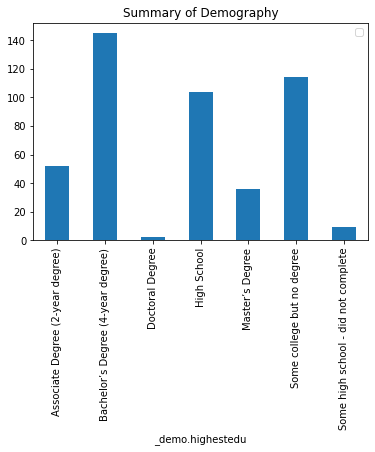

Bachelor’s Degree (4-year degree)      145
Some college but no degree             114
High School                            104
Associate Degree (2-year degree)        52
Master’s Degree                         36
Some high school - did not complete      9
Doctoral Degree                          2
Name: _demo.highestedu, dtype: int64


In [0]:
#education 
tmpdf = demo_df.groupby('_demo.highestedu').count()
tmpdf.plot(kind='bar', y='_demo.age', title='Summary of Demography')
plt.show()

print(demo_df['_demo.highestedu'].value_counts())

#### Contingency Table of Demography data
---

In [0]:
demo_df.groupby(['_demo.highestedu','_demo.gender']).count()

_demo.race.undisclose  \
_demo.highestedu                    _demo.gender                                      
Associate Degree (2-year degree)    Female                                      0.0   
                                    I prefer not to disclose                    NaN   
                                    Male                                        2.0   
                                    Other                                       NaN   
Bachelor’s Degree (4-year degree)   Female                                      2.0   
                                    I prefer not to disclose                    0.0   
                                    Male                                        3.0   
                                    Other                                       NaN   
Doctoral Degree                     Female                                      NaN   
                                    I prefer not to disclose                    NaN   
                                    Male                                        0.0   
                                    Other                                       NaN   
High School                         Female                                      2.0   
                                    I prefer not to disclose                    1.0   
                                    Male                                        0.0   
                                    Other                                       NaN   
Master’s Degree                     Female                                      1.0   
                                    I prefer not to disclose                    NaN   
                                    Male                                        0.0   
                                    Other                                       NaN   
Some college but no degree          Female                                      0.0   
                                    I prefer not to disclose                    NaN   
                                    Male                                        3.0   
                                    Other                                       0.0   
Some high school - did not complete Female                                      0.0   
                                    I prefer not to disclose                    NaN   
                                    Male                                        0.0   
                                    Other                                       NaN   

                                                              _demo.age  \
_demo.highestedu                    _demo.gender                          
Associate Degree (2-year degree)    Female                         24.0   
                                    I prefer not to disclose        NaN   
                                    Male                           28.0   
                                    Other                           NaN   
Bachelor’s Degree (4-year degree)   Female                         61.0   
                                    I prefer not to disclose        1.0   
                                    Male                           83.0   
                                    Other                           NaN   
Doctoral Degree                     Female                          NaN   
                                    I prefer not to disclose        NaN   
                                    Male                            2.0   
                                    Other                           NaN   
High School                         Female                         43.0   
                                    I prefer not to disclose        2.0   
                                    Male                           59.0   
                                    Other                           NaN   
Master’s Degree                     Female                         17.0   
                          

### Well Being data:
---

In [0]:
cols = ['_finwellbeing..securing', '_finwellbeing..notenough',
 '_finwellbeing..moneymgmt', '_finwellbeing..gettingby',
 '_finwellbeing..wontlast', '_finwellbeing..gift',
 '_finwellbeing..leftover', '_finwellbeing..behind',
 '_finwellbeing..controlife'
]

wellbeing_df = merged_df[cols]
wellbeing_df = wellbeing_df.astype('category')
wellbeing_df.describe()

,_finwellbeing..securing,_finwellbeing..notenough,_finwellbeing..moneymgmt,_finwellbeing..gettingby,_finwellbeing..wontlast,_finwellbeing..gift,_finwellbeing..leftover,_finwellbeing..behind,_finwellbeing..controlife
count,219,219,219,219,219,219,219,219,219
unique,5,5,5,5,5,5,5,5,5
top,Somewhat,Not at all,Somewhat,Somewhat,Somewhat,Never,Often,Never,Never
freq,68,88,67,63,55,68,56,72,67


### Harassment data : 
---

In [0]:
#shohan code
cols = [
  '_harass', '_harass.type.sexual',
 '_harass.type.racial', '_harass.type.undisclose',
 '_harass.type.other'
]

harass_df = merged_df[cols].astype('category')

print('sexual harassment :', harass_df['_harass.type.sexual'].count())
print('racial harassment :', harass_df['_harass.type.racial'].count())
print('undisclose harassment :', harass_df['_harass.type.undisclose'].count())
print('other harassment :', harass_df['_harass.type.other'].count())

#harass_df.describe()

sexual harassment : 4
racial harassment : 5
undisclose harassment : 1
other harassment : 12


### Service Data :
---

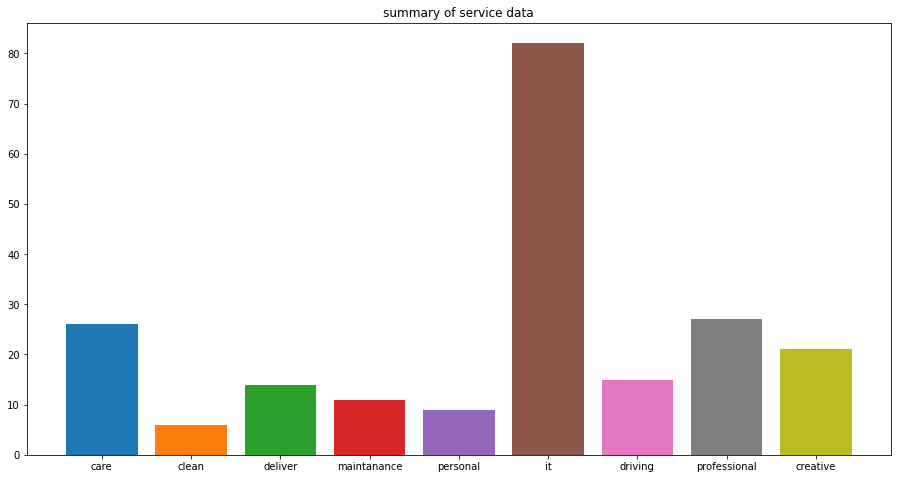

,service_care,service_clean,service_deliver,service_maintanance,service_personal,service_it,service_driving,service_professional,service_creative,service_other,startdate,enddate
count,26,6,14,11,9,82,15,27,21,36,221,221
unique,1,1,1,1,1,1,1,1,1,28,221,221
top,"Care Services - child care, elderly care, adul...",Cleaning Services,Delivery Services - delivery of goods via plat...,"Property Maintenance, Handyman, or Constructio...","Personal Services - fitness, beauty, personal ...","IT Services - setting up printers, networks, p...","Driving Services - Uber, Lyft, etc.","Professional Services - consulting, advisory s...","Creative Work - writing, editing, music compos...",Tutoring,2019-03-19 13:42:20,2019-02-14 18:26:28
freq,26,6,14,11,9,82,15,27,21,6,1,1
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-01 16:18:02,2018-08-01 16:23:24
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-25 14:47:44,2019-05-25 15:03:15


In [0]:
#shohan code
cols = [
'_indw.service.care', '_indw.service.clean', '_indw.service.deliver',
 '_indw.service.maint', '_indw.service.personal', '_indw.service.it',
 '_indw.service.drive', '_indw.service.prof', '_indw.service.create',
 '_indw.service.other'
]

#select data 
service_df = merged_df[cols]
service_df['startdate'] = merged_df['_startdate']
service_df['enddate'] = merged_df['_enddate']

service_df = service_df.rename(columns={
   '_indw.service.care':'service_care',
   '_indw.service.clean': 'service_clean',
   '_indw.service.deliver': 'service_deliver',
   '_indw.service.maint': 'service_maintanance',
   '_indw.service.personal': 'service_personal',
   '_indw.service.it':'service_it',
   '_indw.service.drive':'service_driving',
   '_indw.service.prof':'service_professional',
   '_indw.service.create': 'service_creative',
   '_indw.service.other':'service_other'

})

service_df.astype('category')

service_df['service_care'] = service_df['service_care'].str.strip()
service_df['service_clean'] = service_df['service_clean'].str.strip()
service_df['service_deliver'] = service_df['service_deliver'].str.strip()
service_df['service_maintanance'] = service_df['service_maintanance'].str.strip()
service_df['service_personal'] = service_df['service_personal'].str.strip()
service_df['service_it'] = service_df['service_it'].str.strip()
service_df['service_professional'] = service_df['service_professional'].str.strip()
service_df['service_creative'] = service_df['service_creative'].str.strip()

fig = plt.figure()
ax = fig.add_axes([0,0,2,1.5])

ax.bar(x='care', height=service_df['service_care'].value_counts())
ax.bar(x='clean', height=service_df['service_clean'].value_counts())
ax.bar(x='deliver', height=service_df['service_deliver'].value_counts())
ax.bar(x='maintanance', height=service_df['service_maintanance'].value_counts())
ax.bar(x='personal', height=service_df['service_personal'].value_counts())
ax.bar(x='it', height=service_df['service_it'].value_counts())
ax.bar(x='driving', height=service_df['service_driving'].value_counts())
ax.bar(x='professional', height=service_df['service_professional'].value_counts())
ax.bar(x='creative', height=service_df['service_creative'].value_counts())
#ax.bar(x='other', height=service_df['service_other'].value_counts())
plt.title('summary of service data')
plt.show()


service_df.describe()
#service_df.columns

### Income Data: 
---

These columns are messy. Does not have proper data type.
So what I did here 

* remove the tailing space 
* replace special characters 
* fill NULL value with default `0`
* match expression with regx (hardest part) 
* add proper category 


#### clean Income data 
---

To clraify **income** and **hourly_income** columns: 

* **income:** In the past 6 months, how much did you earn in total from your gig work, after deducting your business expenses from your income?

* **hourly_income:** *In the past 6 months, how much did you usually earn per hour for your gig work?*
---

In [0]:
#shohan code

income_df = service_df
income_df['income'] = merged_df['_indw.inc.total'] # _indw.inc.total.6
income_df['hourly_income'] = merged_df['_indw.hourly'] # _indw.hourlypay.6
# need to clean this data
income_df['work_hours'] = merged_df['_indw.hours'] #_indw.hours.6

#remove tailing space
income_df['income'] = income_df['income'].str.strip()
income_df['income'] = income_df['income'].str.replace(',','')

income_df['hourly_income'] = income_df['hourly_income'].str.strip()

#fill Null 
income_df['income'] = income_df['income'].fillna(0)
income_df['hourly_income'] = income_df['hourly_income'].fillna(0)

#clean 
income_df['income'].replace(regex=True, inplace=True, to_replace=r'(\d+[\,][0-9]+\s)|(^[0-9]+[\-])', value=r'') # (^[0-9][0-9][\-]+)
income_df['hourly_income'].replace(regex=True, inplace=True, to_replace=r'^[0-9][0.0-9.0][\-]+', value=r'') #20-21 17.5 12-20  #10-12,000 #20,000 1,000
income_df['hourly_income'].replace(regex=True, inplace=True, to_replace=r'\D+', value=r'') #20+

#convert 
income_df['income'] = income_df['income'].astype(float)
income_df['hourly_income'] = income_df['hourly_income'].astype(float)
income_df['work_hours'] = income_df['work_hours'].astype('category')

#income_df[income_df['income'] > 10000]['income']
#income_df['hourly_income']

#income_df.info()
#income_df.head()
#income_df.describe()
#income_df['work_hours'].unique()

#### Median Income data with N
---

In [0]:
#shohan code #(greg edit key)

# if the median income of uber driver is $100, 
# i also need to know how many people that is collected from. If its the median of 5 drivers, the table should have n=5

#tmpdf = pd.crosstab(index=[income_df.income, income_df.hourly_income], columns=[income_df.service_driving], margins=True)

cols = ['service_care', 'service_clean', 'service_deliver', 'service_maintanance', 
        'service_personal', 'service_it', 'service_driving', 'service_professional', 'service_creative']

income_median = income_df.groupby(['service_care'])[['income', 'hourly_income']].median()
income_median['N'] = income_df['service_care'].value_counts()
#print(income_median)

for col in cols:
  income_median = income_df.groupby([col])[['income', 'hourly_income']].median()
  income_median['N'] = income_df[col].value_counts()
  print(income_median)

#print(income_median)

                                                    income  hourly_income   N
service_care                                                                 
Care Services - child care, elderly care, adult...   900.0           20.0  26
                   income  hourly_income  N
service_clean                              
Cleaning Services  2750.0           17.0  6
                                                    income  hourly_income   N
service_deliver                                                              
Delivery Services - delivery of goods via platf...  2750.0           18.5  14
                                                    income  hourly_income   N
service_maintanance                                                          
Property Maintenance, Handyman, or Construction...   600.0           23.0  11
                                                    income  hourly_income  N
service_personal                                                            
Personal Ser

#### Contengency Table of Income, Hourly-Income, Working-Hours
---

In [0]:
#shohans code 

#print(income_df['work_hours','income','hourly_income'])['service_driving'].count())
#print(income_df['service_it'].count())

tt = income_df.loc[ income_df['service_driving'].notnull(), ['income', 'hourly_income', 'work_hours']]
tmpdf = pd.crosstab(index=[tt.work_hours], columns=[tt.hourly_income, tt.income], margins=True)
display(tmpdf)

#print(tt.groupby(['work_hours','income','hourly_income']).head())

#print(income_df['service_driving'].count())

hourly_income                 12.0 15.0          17.0          20.0         \
income                      1750.0 60.0 7500.0 3500.0 6000.0 3000.0 5000.0   
work_hours                                                                   
1-14 hours per week              1    1      0      0      0      0      0   
15-34 hours per week             0    0      0      0      0      0      1   
35-50 hours per week             0    0      1      0      0      1      0   
More than 50 hours per week      0    0      0      0      1      0      0   
Varied a lot by week             0    0      0      1      0      0      0   
All                              1    1      1      1      1      1      1   

hourly_income                              25.0   30.0  50.0         185.0  \
income                      5500.0 20000.0  0.0 9600.0 100.0 2100.0 6000.0   
work_hours                                                                   
1-14 hours per week              0       0    0      0     1      0      0   
15-34 hours per week             0       1    0      1     0      0      1   
35-50 hours per week             0       0    0      0     0      0      0   
More than 50 hours per week      1       0    1      0     0      0      0   
Varied a lot by week             0       0    0      0     0      1      0   
All                              1       1    1      1     1      1      1   

hourly_income                225.0 All  
income                      6500.0      
work_hours                              
1-14 hours per week              0   3  
15-34 hours per week             0   4  
35-50 hours per week             1   3  
More than 50 hours per week      0   3  
Varied a lot by week             0   2  
All                              1  15

#### What is the gig income by peole in different industries by hours-work ?

In [0]:
# shohan code 


#### Median income of per month :
---

In [0]:
#gregs code

# 6 months earning (since the data is merged with 9months I think it is wrong here (shohan))
care = income_df.groupby('service_care')['income'].median().astype(int)
clean = income_df.groupby('service_clean')['income'].median().astype(int)
deliver = income_df.groupby('service_deliver')['income'].median().astype(int)
maintanance = income_df.groupby('service_maintanance')['income'].median().astype(int)
personal = income_df.groupby('service_personal')['income'].median().astype(int)
it = income_df.groupby('service_it')['income'].median().astype(int)
driving = income_df.groupby('service_driving')['income'].median().astype(int)
professional = income_df.groupby('service_professional')['income'].median().astype(int)
creative = income_df.groupby('service_creative')['income'].median().astype(int)

#print(income_df['service_care'].value_counts())

#(since the data is merged with 9months I think it is wrong here (shohan)
print('Care Services - child care, elderly care, adult care, or pet care, etc. : ', int(care/6))
print('Cleaning Services : ', int(clean/6))
print('Delivery Services - delivery of goods via platforms like Postmates and DoorDash :',int(deliver/6))
print('Property Maintenance, Handyman, or Construction Services :', int(maintanance/6))
print('Personal Services - fitness, beauty, personal training, etc. :', int(personal/6))
print('IT Services - setting up printers, networks, programming, data entry, etc :', int(it/6))
print('Driving Services - Uber, Lyft, etc. :', int(driving/6))
print('Professional Services - consulting, advisory services, training, research, etc. :', int(professional/6))
print('Creative Work - writing, editing, music composition, voice-overs, design, performance, etc. :', int(creative/6))


Care Services - child care, elderly care, adult care, or pet care, etc. :  150
Cleaning Services :  458
Delivery Services - delivery of goods via platforms like Postmates and DoorDash : 458
Property Maintenance, Handyman, or Construction Services : 100
Personal Services - fitness, beauty, personal training, etc. : 108
IT Services - setting up printers, networks, programming, data entry, etc : 416
Driving Services - Uber, Lyft, etc. : 833
Professional Services - consulting, advisory services, training, research, etc. : 366
Creative Work - writing, editing, music composition, voice-overs, design, performance, etc. : 166


#### Graph of Median income 
---

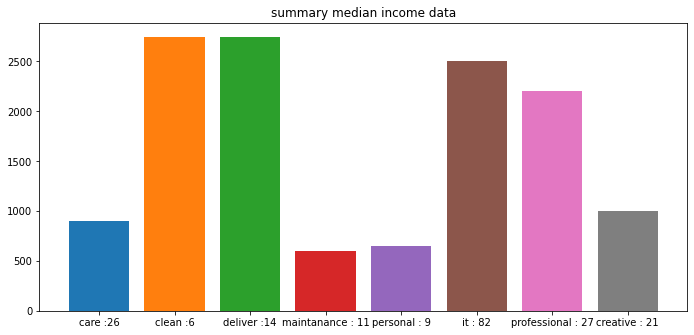

In [0]:
#shohan code (depends on gregs code top cell)
#c = income_df['service_care'].value_counts().iloc[0]
#print(c)

fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])

ax.bar(x='care :'+str(income_df['service_care'].value_counts().iloc[0]), height=care)
ax.bar(x='clean :' + str(income_df['service_clean'].value_counts().iloc[0]), height=clean)
ax.bar(x='deliver :'+str(income_df['service_deliver'].value_counts().iloc[0]), height=deliver)
ax.bar(x='maintanance : '+str(income_df['service_maintanance'].value_counts().iloc[0]), height=maintanance)
ax.bar(x='personal : '+str(income_df['service_personal'].value_counts().iloc[0]), height=personal)
ax.bar(x='it : '+str(income_df['service_it'].value_counts().iloc[0]), height=it)
ax.bar(x='professional : '+str(income_df['service_professional'].value_counts().iloc[0]), height=professional)
ax.bar(x='creative : '+str(income_df['service_creative'].value_counts().iloc[0]), height=creative)

plt.title('summary median income data')
plt.show()

#### Summary of Mean Income data 

In [0]:
#shohan code
#print('mean of the whole survey data : \n ', income_df.mean(axis=0, skipna=True, numeric_only=True))

print(income_df.groupby('service_care').mean().astype(int))
print(income_df.groupby('service_clean').mean().astype(int))
print(income_df.groupby('service_deliver').mean().astype(int))
print(income_df.groupby('service_maintanance').mean().astype(int))
print(income_df.groupby('service_personal').mean().astype(int))
print(income_df.groupby('service_it').mean().astype(int))
print(income_df.groupby('service_driving').mean().astype(int))
print(income_df.groupby('service_professional').mean().astype(int))
print(income_df.groupby('service_creative').mean().astype(int))

                                                    income  hourly_income
service_care                                                             
Care Services - child care, elderly care, adult...    2436           8715
                   income  hourly_income
service_clean                           
Cleaning Services    4171             33
                                                    income  hourly_income
service_deliver                                                          
Delivery Services - delivery of goods via platf...    3658             20
                                                    income  hourly_income
service_maintanance                                                      
Property Maintenance, Handyman, or Construction...    2507            101
                                                    income  hourly_income
service_personal                                                         
Personal Services - fitness, beauty, personal t...    2324     

### Employment preference Data
---

In [0]:
cols = [
        '_emplpreference' ,
        '_emplpreference.other'
]

emp_df = merged_df[cols]
emp_df = emp_df.rename(columns={
    '_emplpreference': 'emp_preference',
    '_emplpreference.other': 'other_emp_preference'
})

emp_df = emp_df.astype('category')
emp_df['emp_preference'] = emp_df['emp_preference'].str.strip()

display(emp_df['emp_preference'].value_counts())


A paid employee of a company or organization                              116
A small business owner selling products                                    54
A gig worker, independent contractor, or freelancer providing services     34
Other (please specify)                                                     16
Name: emp_preference, dtype: int64

### Unemployment Data : 
--- 


1.   **unemp_earner :** In the past 6 months, did you have any periods of unemployment, meaning any time that you wanted to work to earn an income but were not able to?

2.   **unemp_months**: How many months were you unemployed?

3.   **unemp_reason:** Employment reason ?

4.   **other_unemp_reason**: Other employment reason ? 





In [0]:
#shohan code
cols = [
  '_unempearner', '_unempearner.month', '_unempearner.reason',
 '_unempearner.reason.other'
]

unemp_df = merged_df[cols]

#rename
unemp_df = unemp_df.rename(columns={
    '_unempearner':'unemp_earner',
    '_unempearner.month': 'unemp_months',
    '_unempearner.reason': 'unemp_reason',
    '_unempearner.reason.other': 'other_unemp_reason'

})

#clean  
unemp_df['unemp_months'].fillna('0', inplace=True)

unemp_df['unemp_earner'] = unemp_df['unemp_earner'].str.strip()
unemp_df['unemp_months'] = unemp_df['unemp_months'].str.strip()
unemp_df['unemp_reason'] = unemp_df['unemp_reason'].str.strip()
unemp_df['other_unemp_reason'] = unemp_df['other_unemp_reason'].str.strip()


#category 
unemp_df['unemp_earner'] = unemp_df['unemp_earner'].astype('category')
unemp_df['unemp_reason'] = unemp_df['unemp_reason'].astype('category')
unemp_df['other_unemp_reason'] = unemp_df['other_unemp_reason'].astype('category')

unemp_df['unemp_months'] = unemp_df['unemp_months'].astype(float)

#tmp_df = unemp_df.append(service_df, ignore_index=True)
#tmp_df.drop(columns=['income', 'hourly_income'], inplace=True)
#tmp_df.describe()

#unemployment reasons 
display(unemp_df.groupby('unemp_reason').count())

#other unemployment reasons
#display(unemp_df['other_unemp_reason'].value_counts())

,unemp_earner,unemp_months,other_unemp_reason
unemp_reason,,,
I had health or medical limitations,6,6,0
I needed time to attend a training program,5,5,0
I needed time to attend school,23,23,0
I was doing unpaid work as an intern or volunteer,2,2,0
I was looking for paid work but couldn’t find any,81,81,0
I was not trying to earn income or not interested in working,3,3,0
I was taking care of children (including pregnancy) or other people,4,4,0
Other (please specify),35,35,35


### Sell Data  
---

In [0]:
cols = [
        '_sell.good.resale', '_sell.good.handicraft',
 '_sell.good.used', '_sell.good.other', '_sell.connect.ecomm',
 '_sell.connect.social', '_sell.connect.classified',
 '_sell.connect.personal', '_sell.connect.other', '_sell.inc.total',
 '_sell.busexpense', '_sell.inc.aftertax', '_sell.earnings',
]

#select from merged data
sells_df = merged_df[cols]

#rename
sells_df = sells_df.rename(columns={
  '_sell.good.resale' : 'sell_good_resale',
  '_sell.good.handicraft': 'sell_handicraft',
 '_sell.good.used': 'sell_used',
  '_sell.good.other': 'sell_other',
  '_sell.connect.ecomm': 'sell_on_ecommerce',
 '_sell.connect.social': 'sell_on_socialmedia',
 '_sell.connect.classified':'sell_on_classified',
 '_sell.connect.personal':'sell_on_personal',
  '_sell.connect.other':'sell_on_other',
   '_sell.inc.total':'sell_income_total',
 '_sell.busexpense':'sell_business_expense',
  '_sell.inc.aftertax':'sell_income_aftertax',
   '_sell.earnings':'_sell_earning'
})

#clean 
sells_df['sell_income_total'].fillna('0', inplace=True)
sells_df['sell_income_aftertax'].fillna('0', inplace=True)

#convert 
sells_df['sell_income_total'] = sells_df['sell_income_total'].astype(int) 
sells_df['sell_income_aftertax'] = sells_df['sell_income_aftertax'].astype(int) 

sells_df['sell_on_ecommerce'] = sells_df['sell_on_ecommerce'].astype('category')
sells_df['sell_other'] = sells_df['sell_other'].astype('category')
sells_df['sell_on_socialmedia'] = sells_df['sell_on_socialmedia'].astype('category')
sells_df['sell_on_classified'] = sells_df['sell_on_classified'].astype('category')
sells_df['sell_on_other'] = sells_df['sell_on_other'].astype('category')
sells_df['sell_on_personal'] = sells_df['sell_on_personal'].astype('category')

#summary
display(sells_df.groupby('sell_handicraft').sum())
display(sells_df.groupby('sell_used').sum())
display(sells_df.groupby('sell_other').sum())
display(sells_df['sell_other'].value_counts())

display(sells_df.groupby('sell_on_ecommerce').sum())
display(sells_df.groupby('sell_on_socialmedia').sum())


#display(sells_df['sell_handicraft'].value_counts())
#sells_df.head()

,sell_income_total,sell_income_aftertax
sell_handicraft,,
New handicrafts/artwork that you made specifically for sale,22900,12925


,sell_income_total,sell_income_aftertax
sell_used,,
Used or second-hand goods,6850,3000


,sell_income_total,sell_income_aftertax
sell_other,,
Bread,40,40
Refurbished items,6000,4800


Refurbished items    1
Bread                1
Name: sell_other, dtype: int64

,sell_income_total,sell_income_aftertax
sell_on_ecommerce,,
"Through e-commerce sites - Etsy, eBay, etc",6850,3000


,sell_income_total,sell_income_aftertax
sell_on_socialmedia,,
"Through social media platforms - Facebook, LinkedIn, etc.",21490,11590


### Business Data
---
> mostly empty, only 2-3 field is not empty

In [0]:
cols = [
  '_bus.hours',
 '_bus.inc.beforetax', '_bus.busexpense', '_bus.inc.aftertax',
 '_bus.earnings', '_satisfaction.bus' 
]

business_df = merged_df[cols]

#rename
business_df = business_df.rename(columns={
 '_bus.hours' : 'bus_hours',
 '_bus.inc.beforetax':'bus_income_beforetax', 
 '_bus.busexpense':'bus_expenses', 
 '_bus.inc.aftertax':'bus_income_aftertaxt',
 '_bus.earnings':'bus_earning',
 '_satisfaction.bus':'bus_satisfaction'
})

#summary 
#business_df.info()

display(business_df[business_df.bus_satisfaction.notnull()])


,bus_hours,bus_income_beforetax,bus_expenses,bus_income_aftertaxt,bus_earning,bus_satisfaction
29,1-14 hours per week,550,No,550,Best guess,1
84,1-14 hours per week,4000,Yes,3500,Best guess,9
105,1-14 hours per week,400,No,NaN,Best guess,8
228,More than 50 hours per week,15000,Yes,-25000,Best guess,6
244,1-14 hours per week,1200,Yes,700,Best guess,6
303,35-50 hours per week,"27,000",No,NaN,Best guess,8
313,More than 50 hours per week,0,Yes,0,Based on calculations and records,7
346,15-34 hours per week,7000,Yes,6400,Best guess,7
371,15-34 hours per week,2000,Yes,600,Best guess,7
372,15-34 hours per week,0,Yes,0,Based on calculations and records,10


### Freelance/Gig Data:
--- 
  1. Are you interested in more training on how to be a successful freelance, gig, or independent contract worker?

  2. What topics are you most interested in for more training? You can choose more than one option, so choose as many as apply to you.

mean satisfaction level of doing gig work : 3.749578850430107
median satisfaction level of doing gig work : 2.203791469194313
Training interest : 
 Neutral    444
Yes        136
No          53
Name: train_interest, dtype: int64


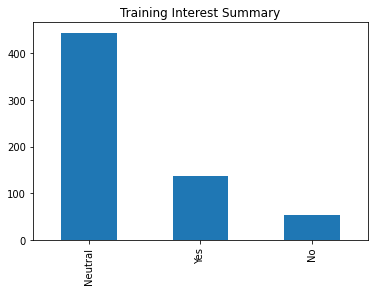

In [0]:
cols = [
  '_indw.traininterest', '_indw.train.clientacq',
 '_indw.train.clientmgmt', '_indw.train.custservice',
 '_indw.train.compskill', '_indw.train.brand', '_indw.train.timemgmt',
 '_indw.train.financiallit', '_indw.train.taxlegal',
 '_indw.train.benioption', '_indw.train.busowner',
 '_indw.train.techskill', '_indw.train.other', '_indw.incdescribe',
 '_satisfaction.indw', '_indw.howlong'
]

#select 
train_df = merged_df[cols]

#rename 
train_df = train_df.rename(columns={
  '_indw.traininterest': 'train_interest',
  '_indw.train.clientacq': 'train_client_acq',
 '_indw.train.clientmgmt': 'train_client_mgmt', 
 '_indw.train.custservice': 'train_customer_service',
 '_indw.train.compskill': 'train_computer_skill', 
 '_indw.train.brand': 'train_personal_brand',
 '_indw.train.timemgmt': 'train_time_mgmt',
 '_indw.train.financiallit': 'train_financial',
  '_indw.train.taxlegal': 'train_tax',
 '_indw.train.benioption': 'train_research',
  '_indw.train.busowner': 'train_business_owner',
 '_indw.train.techskill': 'train_tech',
  '_indw.train.other': 'train_other',
 '_satisfaction.indw': 'satisfaction_level',
  '_indw.howlong': 'how_long', #how long did freelancer work 
  '_indw.incdescribe': 'freelance_income' #In the past 6 months, which of the following best describes the income you earned from gig work?
})

#clean 
train_df['satisfaction_level'].fillna('0', inplace=True)
train_df['train_interest'].fillna('Neutral', inplace=True)

#convert dtype 
train_df['satisfaction_level'] = train_df['satisfaction_level'].astype(float)
train_df['satisfaction_level'] = train_df['satisfaction_level'].replace(0, train_df['satisfaction_level'].mean())

train_df['freelance_income'] = train_df['freelance_income'].astype('category')
train_df['train_interest'] = train_df['train_interest'].astype('category')

#summary
print('mean satisfaction level of doing gig work :', train_df['satisfaction_level'].mean())
print('median satisfaction level of doing gig work :', train_df['satisfaction_level'].median())
print('Training interest : \n',train_df['train_interest'].value_counts())

#plot
train_df['train_interest'].value_counts().plot(kind='bar', title='Training Interest Summary')
plt.show() 

#train_df.head(10)



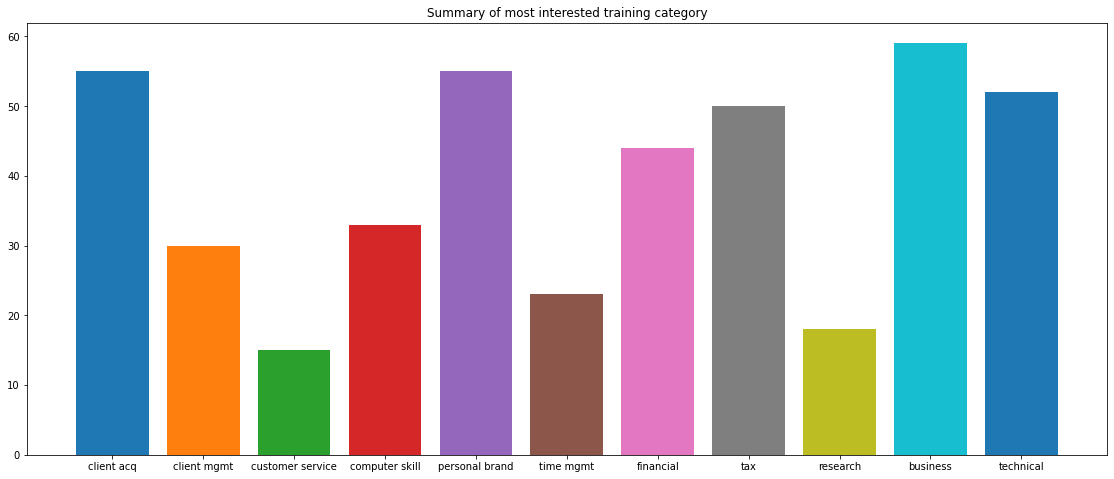

In [0]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2.5, 1.5])

ax.bar(x='client acq', height=train_df['train_client_acq'].value_counts())
ax.bar(x='client mgmt', height=train_df['train_client_mgmt'].value_counts())
ax.bar(x='customer service', height=train_df['train_customer_service'].value_counts())
ax.bar(x='computer skill', height=train_df['train_computer_skill'].value_counts())
ax.bar(x='personal brand', height=train_df['train_personal_brand'].value_counts())
ax.bar(x='time mgmt', height=train_df['train_time_mgmt'].value_counts())
ax.bar(x='financial', height=train_df['train_financial'].value_counts())
ax.bar(x='tax', height=train_df['train_tax'].value_counts())
ax.bar(x='research', height=train_df['train_research'].value_counts())
ax.bar(x='business', height=train_df['train_business_owner'].value_counts())
ax.bar(x='technical', height=train_df['train_tech'].value_counts())

plt.title('Summary of most interested training category')
plt.show()

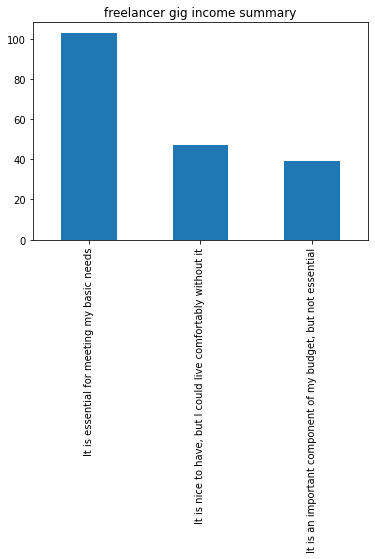

In [0]:
train_df['freelance_income'].value_counts().plot(kind='bar', title='freelancer gig income summary')
plt.show()

#### What type of freelance, gig, or independent contract work did you most frequently do?

In [0]:
#gregs code : (I have fixed the error(shohan))
# do you want to 6 months data ? then use df 
# for 9 month df2

most_freq_gig = merged_df['_indw.type'].to_frame()
most_freq_gig['_indw.type'] = most_freq_gig['_indw.type'].astype('category')

#most_freq_gig[most_freq_gig['_indw.type'].notnull()].count()
#most_freq_gig['_indw.type'].unique()

display(most_freq_gig['_indw.type'].value_counts())

Ongoing or repeat work with a consistent set of clients    112
One-off projects with various clients                       77
Name: _indw.type, dtype: int64

### Benifit Data
----


In [0]:
cols = [
'_indw.benefit.life', '_indw.benefit.paidsick',
 '_indw.benefit.paidfam', '_indw.benefit.retire',
 '_indw.benefit.disability', '_indw.benefit.unemployment',
 '_indw.benefit.workercomp', '_indw.benefit.health'
]

benefit_df = merged_df[cols]

benefit_df = benefit_df.rename(columns={
   '_indw.benefit.life':'benefit_life_insurance',
   '_indw.benefit.paidsick': 'benefit_paid_sick',
   '_indw.benefit.paidfam': 'benefit_paid_family_leave',
   '_indw.benefit.retire': 'benefit_retire',
   '_indw.benefit.disability': 'benefit_disability',
   '_indw.benefit.unemployment': 'benefit_unemployment',
   '_indw.benefit.workercomp': 'benefit_work_comp',
   '_indw.benefit.health': 'benefit_health'
})

#forward fill
#benefit_df.ffill(axis=1, inplace=True)
#benefit_df.fillna('0', inplace=True)

#convert dtype
benefit_df = benefit_df.astype(float)
#benefit_df.replace(0, benefit_df.mean(), inplace=True)

#benefit_df.info()
benefit_df.head()

,benefit_life_insurance,benefit_paid_sick,benefit_paid_family_leave,benefit_retire,benefit_disability,benefit_unemployment,benefit_work_comp,benefit_health
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3.0,2.0,1.0,NaN,4.0,6.0,5.0
3,1.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The mean value of benefit data
--- 

* **Unemployment Insurance** and **Workers Compensation Insurance (in case of work injury or illness)** is the most prefered benefit for freelance gig worker. 


In [0]:
benefit_df.mean()

benefit_life_insurance       4.038462
benefit_paid_sick            2.620000
benefit_paid_family_leave    3.304348
benefit_retire               2.988764
benefit_disability           4.490196
benefit_unemployment         4.222222
benefit_work_comp            3.629630
benefit_health               1.511494
dtype: float64

### Concern Data
----
* As a freelance, gig, or independent contract worker, what are your top 3 concerns? 


In [0]:
cols = ['_indw.concern.findwork','_indw.concern.getwork', '_indw.concern.income',
 '_indw.concern.fairpay', '_indw.concern.latepay',
 '_indw.concern.retire', '_indw.concern.savemoney',
 '_indw.concern.benefit', '_indw.concern.taxrate',
 '_indw.concern.debt', '_indw.concern.taxlegal',
 '_indw.concern.career', '_indw.concern.discrimin',
 '_indw.concern.other',
 ]

concern_df = df[cols]
# '_indw.type.6' '_indw.searchtime.6' 
concern_df.describe()

,_indw.concern.findwork,_indw.concern.getwork,_indw.concern.income,_indw.concern.fairpay,_indw.concern.latepay,_indw.concern.retire,_indw.concern.savemoney,_indw.concern.benefit,_indw.concern.taxrate,_indw.concern.debt,_indw.concern.taxlegal,_indw.concern.career,_indw.concern.discrimin,_indw.concern.other
count,33,35,43,27,18,10,6,49,5,3,28,12,6,16
unique,3,3,3,3,3,3,3,3,2,2,3,3,3,16
top,1st Concern,3rd Concern,2nd Concern,1st Concern,3rd Concern,3rd Concern,2nd Concern,2nd Concern,2nd Concern,3rd Concern,3rd Concern,3rd Concern,3rd Concern,Government benefit reduction
freq,19,13,17,10,8,4,3,19,3,2,11,5,2,1


* On average, how long would it take you to find freelance, gig, or independent contract work, between looking for work and actually starting it?

In [0]:
#shohan code 
search_time = df['_indw.searchtime']
search_time.value_counts()

1-2 weeks             21
I don’t know          19
4-6 days              14
Less than 24 hours    12
1-3 days              10
3-4 weeks              9
More than a month      7
Name: _indw.searchtime, dtype: int64

Gray code below


In [0]:
#Read in data from spreadsheets

df = pd.read_csv('/content/Copy of Samaschool_1 Month Data_T4A - 1Month.csv')
df2 = pd.read_csv('/content/Copy of Samaschool_6 Month Data_T4A - 6Month.csv')
df3 = pd.read_csv('/content/Copy of Samaschool_9 Month Data_T4A - 9Month.csv')

df = df.rename(columns=df.iloc[1])
df2 = df2.rename(columns=df2.iloc[1])
df3 = df3.rename(columns=df3.iloc[1])

df.drop(df.index[:3], inplace=True)
df2.drop(df2.index[:3], inplace=True)
df3.drop(df3.index[:3], inplace=True)

In [0]:
print('data 1 :', df.shape)
print('data 2 :', df2.shape)
print('data 3 :', df3.shape)

In [0]:
#drop the columns where all elements are NaN:

df = df.dropna(axis=1, how='all')
df2 = df2.dropna(axis=1, how='all')
df3 = df3.dropna(axis=1, how='all')

In [0]:
print(df.shape)
print(df2.shape)
print(df3.shape)

In [0]:
#clean column names
df.columns = df.columns.str.replace('\d+', '')
df.columns = df.columns.str.rstrip('.')

df2.columns = df2.columns.str.replace('\d+', '')
df2.columns = df2.columns.str.rstrip('.')

df3.columns = df3.columns.str.replace('\d+', '')
df3.columns = df3.columns.str.rstrip('.')

Merge dataframe

In [0]:
#merge 3 df into one dataframe
merged = pd.merge(df, df2, how='outer')
merged = merged.merge(df3, how='outer')

In [0]:
merged.shape

In [0]:
#rename unnamed column to City
merged.rename(columns={merged.columns[50]: 'City'}, inplace=True)

Track income of gig work

In [0]:
#gregs code 
# note from shohan : need to clean these data and convert dtypes
continuous = ['_emp.annsalary', '_emp.hourly', '_emp.earnings','_emp.hours']
emp_income =  merged_df[continuous]

emp_income['_emp.earnings'] = emp_income['_emp.earnings'].astype('category')
emp_income['_emp.hours'] = emp_income['_emp.hours'].astype('category')

#clean data 
emp_income['_emp.annsalary'] = emp_income['_emp.annsalary'].fillna('0')
emp_income['_emp.annsalary'] = emp_income['_emp.annsalary'].str.replace(r'\D', '')
emp_income['_emp.annsalary'] = emp_income['_emp.annsalary'].str.strip()
emp_income['_emp.annsalary'] = emp_income['_emp.annsalary'].astype(float)

emp_income['_emp.hourly'] = emp_income['_emp.hourly'].fillna('0')
emp_income['_emp.hourly'].replace(regex=True, inplace=True, to_replace=r'^[0-9][0.0-9.0][\-]+', value=r'')
emp_income['_emp.hourly'] = emp_income['_emp.hourly'].str.strip()
emp_income['_emp.hourly'] = emp_income['_emp.hourly'].astype(float)

#emp_income['_emp.hourly'].unique()
#emp_income.head()
#disrtibution of _emp.hourly
sns.distplot(emp_income['_emp.hourly'], bins=10)
plt.show()

#print(emp_income['_emp.earnings'].unique())

emp_income.groupby(['_emp.earnings', '_emp.hours']).mean()


In [0]:
# #Dataframe with matching respondent ids
# common_respondents = df.merge(df2, how='left', on='_respondentid')
# common_respondents = common_respondents.merge(df3, how='left', on='_respondentid')

In [0]:
# common_respondents.shape

In [0]:
# common_respondents.head()

Code

In [0]:
##groupby attempts

#shohan code #(greg edit key)

# if the median income of uber driver is $100, 
# i also need to know how many people that is collected from. If its the median of 5 drivers, the table should have n=5

tmpdf = pd.crosstab(index=[income_df.work_hours], columns=[income_df.service_driving], values=income_df['income'], aggfunc='median', margins=True)
#pd.crosstab(index=df_tips['day'], columns=df_tips['sex'], values=df_tips['total_bill'], colnames=['gender'], aggfunc='mean').rename(columns={"Male": "mean_bill_size_meals_served_by_males", "Female": "mean_bill_size_meals_served_by_females"})


cols = ['service_care', 'service_clean', 'service_deliver', 'service_maintanance', 
        'service_personal', 'service_it', 'service_driving', 'service_professional', 'service_creative']

income_median = income_df.groupby(['service_care'])[['income', 'hourly_income']].median()
#income_agg = income_df.groupby(['service_care'])[['income']].agg([pd.sum(), pd.median(), pd.std(), pd.count()])

#x = income_df.groupby('service_driving').agg([np.sum, np.median, np.std])
#income_median['N'] = income_df['service_care'].value_counts()
#print(income_median)

#for col in cols:
#  income_median = income_df.groupby([col])[['work_hours']].median()
#  income_median['N'] = income_df[col].value_counts()
#  print(income_median)

tmpdf

In [0]:
income_df['work_hours']

In [0]:
#income_df.head()

In [0]:
df.head()

In [0]:
df.columns[df.columns.str.contains('service')]

In [0]:
df = pd.read_csv('/content/Copy of Samaschool_6 Month Data_T4A - 6Month.csv', header=2)

In [0]:
df.columns

In [0]:
df.columns[df.columns.str.contains('inc')]

In [0]:
#df.groupby['_service.secondary.clean.6']
df.groupby('_service.secondary.clean.6').aggregate(np.median)

In [0]:
services = ['_service.secondary.care.6', '_service.secondary.clean.6',
       '_service.secondary.deliver.6', '_service.secondary.maint.6',
       '_service.secondary.personal.6', '_service.secondary.it.6',
       '_service.secondary.drive.6', '_service.secondary.prof.6',
       '_service.secondary.create.6', '_service.secondary.other.6',
       '_emp.service.clean.6', '_emp.service.security.6', '_emp.service.it.6',
       '_emp.service.warehouse.6', '_emp.service.other.6',
       '_indw.service.care.6', '_indw.service.clean.6',
       '_indw.service.deliver.6', '_indw.service.maint.6',
       '_indw.service.personal.6', '_indw.service.it.6',
       '_indw.service.drive.6', '_indw.service.prof.6',
       '_indw.service.create.6', '_indw.service.other.6',
       '_indw.train.custservice.6', '_rent.service.house.6',
       '_rent.service.car.6', '_rent.service.other.6']